In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [384]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [306]:
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm

In [50]:
path = 'data/weight.csv'

In [474]:
data = pd.read_csv(path, parse_dates=True, index_col=0)

In [475]:
# resample to daily to get even spacing -- this introduces NA values, but drop them later after getting a nice index for fitting
data = data.resample('D').mean()

# reset index twice to get an 'index' column, which is nicely numbered for use in fitting -- dates don't work so well 
# (FIXME: is the statemnet above about dates true??)
data = data.reset_index().reset_index()

# reset index to Date
data = data.set_index('Date')

In [476]:
# Now that we have an evenly spaced and nicely numbered index, drop NA values
data = data.dropna()

# ... and get x and y values for fitting
x = data['index'].astype('float')
y = data['Weight']

In [477]:
# Fit the values, and get the prediction function
fit = np.polyfit(x, y, deg=1)
predict = np.poly1d(fit)

In [478]:
# We want to extend our fitted trendline into the future, so add an index in the future
trend = x.copy()
days_in_future = 60
last_date = trend.index[-1]
last_date = last_date + dt.timedelta(days=days_in_future)
trend.loc[last_date] = trend[-1] + days_in_future

In [479]:
# get the values for the trend
trend_weight = predict(trend)
trend_df = pd.DataFrame(trend, columns=['index'])
trend_df['Trend'] = trend_weight

In [480]:
# Delete the 'index' column we created for fitting
del data['index']
del trend_df['index']

In [481]:
data.tail()

,Weight
Date,
2018-02-24,212.8
2018-02-25,212.4
2018-02-26,211.2
2018-02-27,209.8
2018-02-28,207.8


In [482]:
trend_df.tail()

,Trend
Date,
2018-02-25,209.562695
2018-02-26,209.456869
2018-02-27,209.351043
2018-02-28,209.245216
2018-04-29,202.895636


In [483]:
# ... and add 'Trend' column to data
#data = data.append(trend_df)
data = pd.DataFrame.join(data, trend_df, how='outer')
#data = data.dropna()
data.tail()

,Weight,Trend
Date,,
2018-02-25,212.4,209.562695
2018-02-26,211.2,209.456869
2018-02-27,209.8,209.351043
2018-02-28,207.8,209.245216
2018-04-29,NaN,202.895636


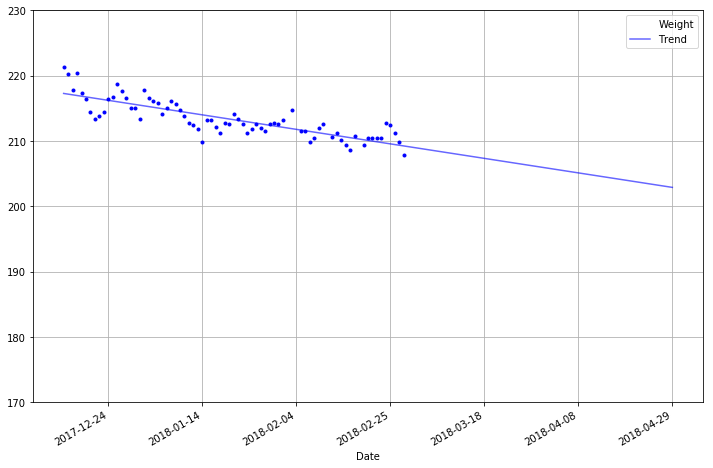

In [489]:
ax = data['Weight'].plot(style='b.', ylim=(170,230), alpha=1.0, legend=True)
data['Trend'].plot(style='b-', alpha=0.6, legend=True)
plt.grid()